<h1 style="text-align: center; font-family: Arial"> TP 1 - Séance 2 </h1>
<h2 style="text-align: center; font-family: Arial"> Transformée de Fourier 1D </h2>

In [2]:
# Importe les modules qui seront utilisé dans le laboratoire.
import numpy as np
from numpy.fft import fft
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
# Étend la taille des figures
plt.rcParams["figure.figsize"] = (12, 7)

# Exercice IV (4 points)
## FFT d'un signal théorique

Soit les trois signaux suivant:<br />
$Y_1(t)=7\cos(2\pi\times6t)$<br />
$Y_2(t)=4\cos(2\pi\times15t + \frac{3\pi}{2})$<br />
$Y_3(t)=-3\cos(2\pi\times30t)$

**1.** Donnez l'amplitude, la fréquence et la phase de chacun de ces signaux.

In [3]:
import unicodedata
import math
phase3 = 3*math.pi/2
print('Selon les équations des trois signaux, on déduit mathématiquement la fréquence, amplitude et phase')
print('Signal 1')
print("Fréquence (Hz): %d | Amplitude: %d | Phase (rad): %d" % (6, 7, 0))
print('Signal 2')
print("Fréquence (Hz): %d | Amplitude: %d | Phase (rad): %f" % (15, 4, phase3))
print('Signal 3')
print("Fréquence (Hz): %d | Amplitude: %d | Phase (rad): %d" % (30, -3, 0))


Selon les équations des trois signaux, on déduit mathématiquement la fréquence, amplitude et phase
Signal 1
Fréquence (Hz): 6 | Amplitude: 7 | Phase (rad): 0
Signal 2
Fréquence (Hz): 15 | Amplitude: 4 | Phase (rad): 4.712389
Signal 3
Fréquence (Hz): 30 | Amplitude: -3 | Phase (rad): 0


Ces signaux sont échantillonés à la fréquence Fe=120Hz pour $0\leq t<1$.

**2.** Affichez les trois signaux superposés sur un même graph.

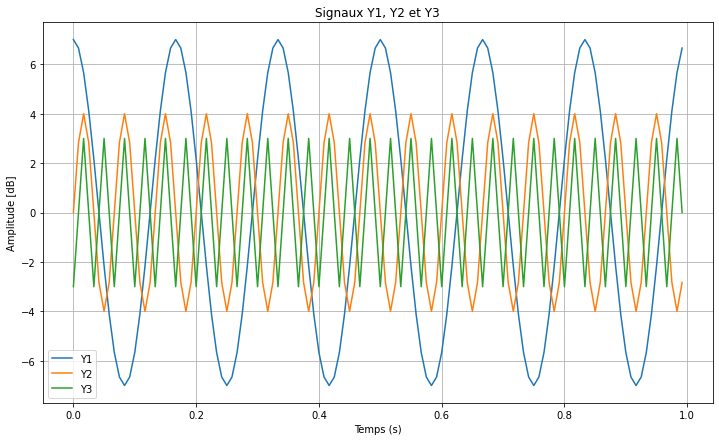

In [4]:
# Attention! np.linspace(0,1,Fe) ne donne pas une fréquence d'échantillonage de 1/Fe mais de 1/(Fe-1).
# Utilisez plutôt np.arange.

import math
arrayT= np.arange(0,1,1/120)
arrayY1=np.zeros(120)
arrayY2=np.zeros(120)
arrayY3=np.zeros(120)

for i in range(120):
    arrayY1[i]=7*math.cos(2*math.pi*6*arrayT[i])
    arrayY2[i]=4*math.cos(2*math.pi*15*arrayT[i]+3*math.pi/2)
    arrayY3[i]=-3*math.cos(2*math.pi*30*arrayT[i])

plt.figure()
plt.plot(arrayT, arrayY1)
plt.plot(arrayT, arrayY2)
plt.plot(arrayT, arrayY3)


plt.title('Signaux Y1, Y2 et Y3')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Temps (s)')
plt.legend(["Y1", "Y2", "Y3"])
plt.grid()
plt.show()


**3.** Affichez la somme des signaux $S(t)=Y_1(t)+Y_2(t)+Y_3(t)$. Déterminez graphiquement la période du signal S.

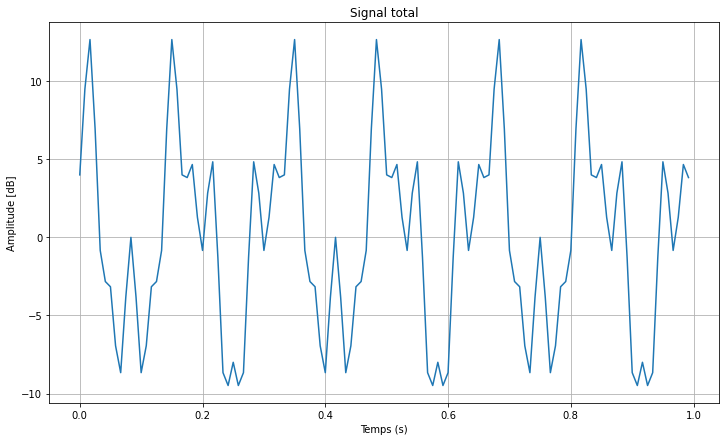

En observant le graphique, on conclu que la période du signal total S(t) est environ 0.325 seconde, c est-à-dire un peu plus que 0.3 seconde. 


In [5]:
S = arrayY1 + arrayY2 + arrayY3
plt.figure()
plt.plot(arrayT, S)
plt.title('Signal total')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Temps (s)')
plt.grid()
plt.show()
print('En observant le graphique, on conclu que la période du signal total S(t) est environ 0.325 seconde, c est-à-dire un peu plus que 0.3 seconde. ')

**4.** Affichez le module et la phase de la FFT des signaux $Y_1(t)$, $Y_2(t)$ et $Y_3(t)$ entre 0 et 125Hz.
Vérifiez que l'amplitude, la fréquence et la phase des signaux correspondent bien aux valeurs attendues.

(Vous pouvez encapsuler le code de calcul et d'affichage de la fft dans une fonction.)

Le graphique du module de la FFT de Y1 montre une fréquence de 6Hz, ce qui correspond à la valeur théorique. On observe que la phase à 6Hz est de 0, tel qu indiqué par la théorie. Pour le signal Y2, la fréquence est observée à 15Hz sur le graphique de la phase. La phase est de -pi/2, ce qui est équivalent à +3pi/2, tel que prédit par la théorie. Pour le signal Y3, la fréquence observée est de 30Hz, correspondant à la théorie. Cependant, on observe une phase de pi alors que la valeur théorique de déphase pour Y3 est de 0. Ceci s explique par le fait que l amplitude de Y3 est négative. Une amplitude négative correspond alors à un déphasage de pi.


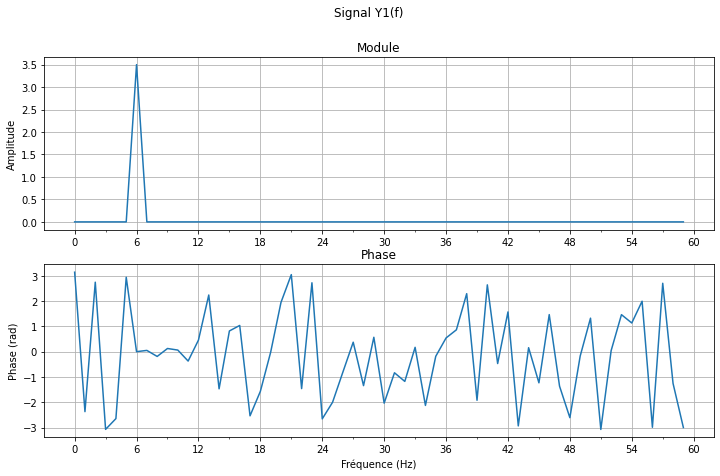

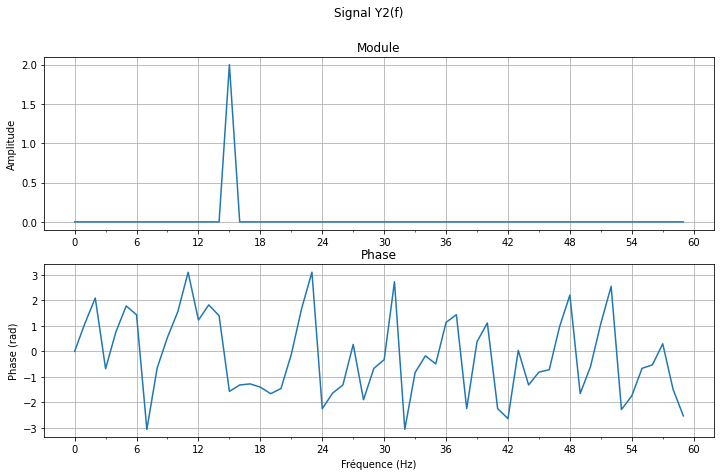

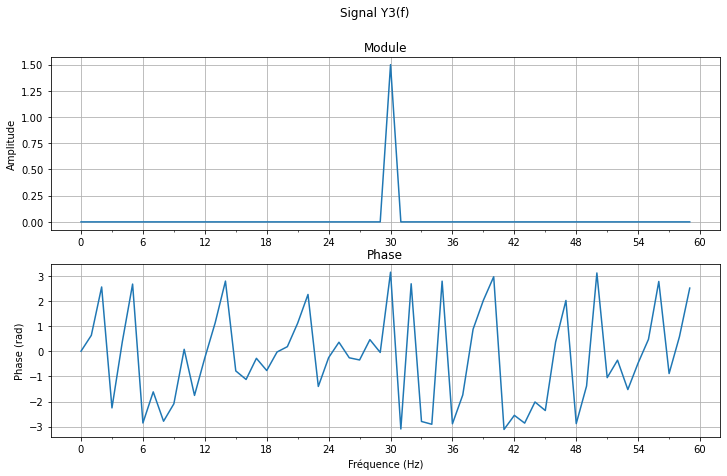

In [6]:
# La fft se calcule avec:  y = fft(Y) / len(Y). 
# Les raies calculées correspondent aux fréquences comprises entre 0 (inclue) et Fe (exclue) avec un pas de Fe/len(Y).
# Leur module est donné par: np.abs(y) et leur phase (en radians) par: np.angle(y)

Fe = 120
fftY1 = fft(arrayY1)/len(arrayY1)
fftY2 = fft(arrayY2)/len(arrayY2)
fftY3 = fft(arrayY3)/len(arrayY3)
x = np.arange(0,60, Fe/len(fftY1))

def disp_signalY(x, module, phase):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as plticker
    locMinor = plticker.MultipleLocator(base=3)
    locMajor = plticker.MultipleLocator(base=6)
    fig, axs = plt.subplots(2)
    axs[0].plot(x, module)
    axs[0].set_title('Module')
    axs[0].xaxis.set_major_locator(locMajor)
    axs[0].xaxis.set_minor_locator(locMinor)
    axs[0].grid(which='major', axis= 'both', linestyle='-')
    axs[0].grid(which='major', axis= 'both', linestyle='-')
    axs[0].set(ylabel='Amplitude')

    axs[1].plot(x, phase)
    axs[1].set_title('Phase')
    axs[1].xaxis.set_major_locator(locMajor)
    axs[1].xaxis.set_minor_locator(locMinor)
    axs[1].grid(which='major', axis= 'both', linestyle='-')
    axs[1].set(xlabel='Fréquence (Hz)', ylabel='Phase (rad)')
    
    
    return fig

angleFFT1 = np.angle(fftY1[:60],deg=False)
angleFFT2 = np.angle(fftY2[:60],deg=False)
angleFFT3 = np.angle(fftY3[:60],deg=False)

fig1 = disp_signalY(x, np.abs(fftY1[:60]), angleFFT1)
fig1.suptitle('Signal Y1(f)')
fig1.show()

fig2 = disp_signalY(x, np.abs(fftY2[:60]), angleFFT2)
fig2.suptitle('Signal Y2(f)')
fig2.show()

fig3 = disp_signalY(x, np.abs(fftY3[:60]),angleFFT3)
fig3.suptitle('Signal Y3(f)')
fig3.show()

print('Le graphique du module de la FFT de Y1 montre une fréquence de 6Hz, ce qui correspond à la valeur théorique. On observe que la phase à 6Hz est de 0, tel qu indiqué par la théorie. Pour le signal Y2, la fréquence est observée à 15Hz sur le graphique de la phase. La phase est de -pi/2, ce qui est équivalent à +3pi/2, tel que prédit par la théorie. Pour le signal Y3, la fréquence observée est de 30Hz, correspondant à la théorie. Cependant, on observe une phase de pi alors que la valeur théorique de déphase pour Y3 est de 0. Ceci s explique par le fait que l amplitude de Y3 est négative. Une amplitude négative correspond alors à un déphasage de pi.')


**5.** De la même manière affichez le spectre de S. Quelle propriété de la transformée ed Fourier est mise-en-évidence par cette expérience?

La propriété de la transformée de Fourier qui est mise en évidence est l additivité puisque les pics des trois signaux sont observés sur le spectre de la fonction S. On observe aussi les mêmes valeurs de phase  pour les fréquences respectives de Y1, Y2 et Y3. L additivité s applique donc aussi aux phases.


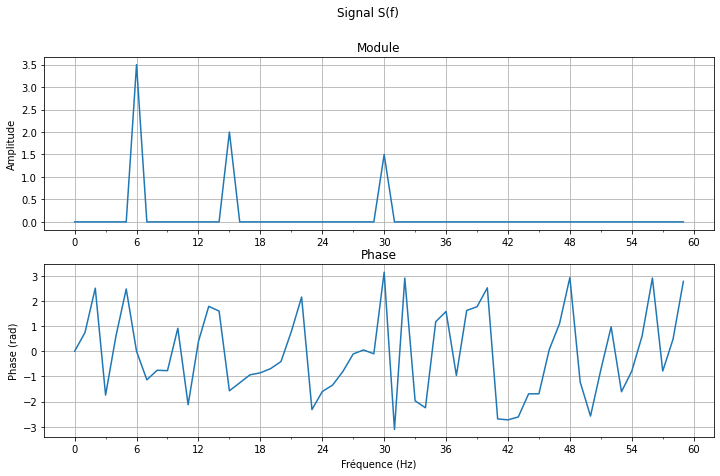

In [47]:
Fe = 120
fftS = fft(S)/len(S)

figTot = disp_signalY(x, np.abs(fftS[:60]), np.angle(fftS[:60]))
figTot.suptitle('Signal S(f)')
figTot.show()

print('La propriété de la transformée de Fourier qui est mise en évidence est l additivité puisque les pics des trois signaux sont observés sur le spectre de la fonction S. On observe aussi les mêmes valeurs de phase  pour les fréquences respectives de Y1, Y2 et Y3. L additivité s applique donc aussi aux phases.')


**6.** Pourquoi est-ce pertinent de tracer le spectre entre 0 et 125Hz plutôt qu'entre 0 et 250Hz?

En traçant les fréquences de 0 à 60 Hz, on affiche seulement la composante positive des equations. Selon la loi d Euler, une fonction cosinus est représentée par deux exponentielles complexes, soit une positive et une négative. La FFT étant un signal périodique, on retrouve les deux composantes positives et négatives (f et -f) périodiquement. La fréquence de 6Hz correspond à f et celle de 114 correspond à la composante négative de la prochaine période, soit Fe - f.


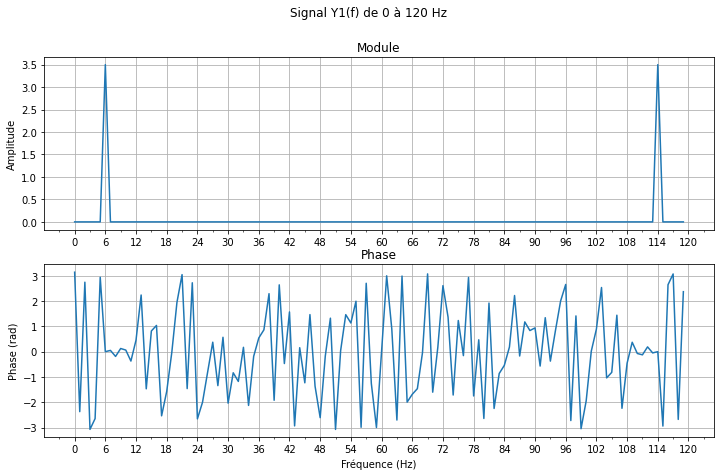

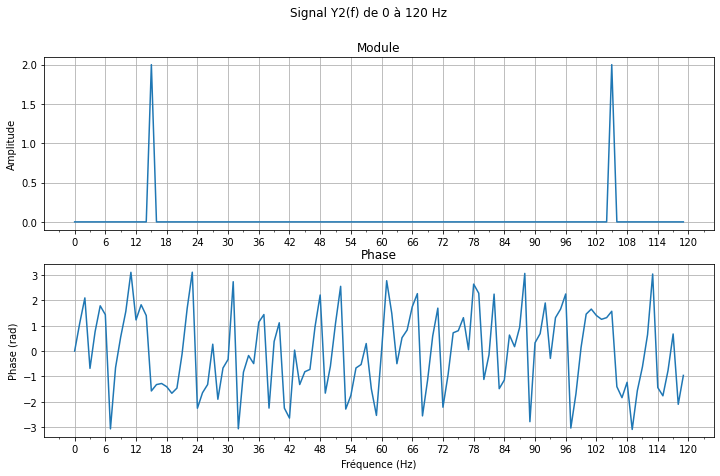

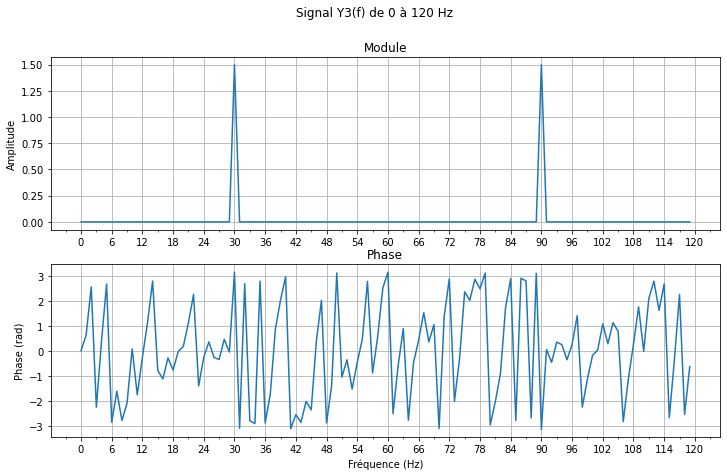

In [50]:
x = np.arange(0,120, Fe/len(fftY1))

fig1 = disp_signalY(x, np.abs(fftY1), np.angle(fftY1))
fig1.suptitle('Signal Y1(f) de 0 à 120 Hz')
fig1.show()

fig2 = disp_signalY(x, np.abs(fftY2), np.angle(fftY2))
fig2.suptitle('Signal Y2(f) de 0 à 120 Hz')
fig2.show()

fig3 = disp_signalY(x, np.abs(fftY3),np.angle(fftY3))
fig3.suptitle('Signal Y3(f) de 0 à 120 Hz')
fig3.show()

print('En traçant les fréquences de 0 à 60 Hz, on affiche seulement la composante positive des equations. Selon la loi d Euler, une fonction cosinus est représentée par deux exponentielles complexes, soit une positive et une négative. La FFT étant un signal périodique, on retrouve les deux composantes positives et négatives (f et -f) périodiquement. La fréquence de 6Hz correspond à f et celle de 114 correspond à la composante négative de la prochaine période, soit Fe - f.')


**7.** Si on retardait $Y_1(t)$ d'un quart de seconde de sorte que $Y_1'(t)=Y_1(t+\frac{1}{4})$, comment évoluerait le module du spectre? Même question pour sa phase (à la fréquence du signal)?

En retardant la fonction Y1 de 1/4 de seconde, le module de son spectre ne change pas, car sa fréquence n est pas affectée par la translation. Cependant, la phase à 6Hz devient non nulle, puisque le décalage de 1/4 induit un changement de phase.


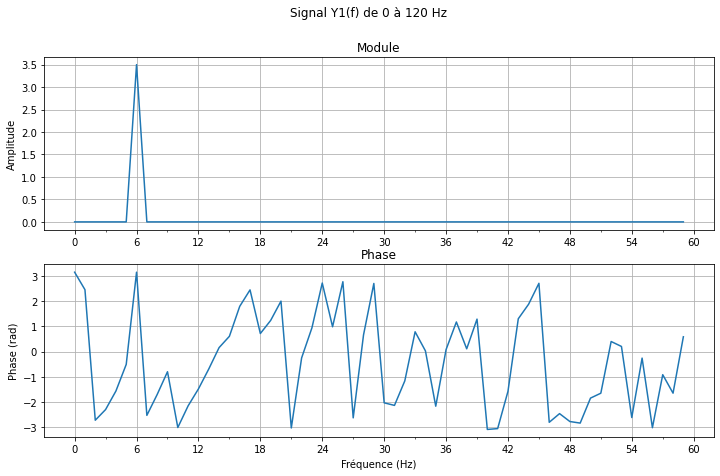

In [8]:
arrayY1D = np.zeros(120)
for i in range(120):
    arrayY1D[i]=7*math.cos(2*math.pi*6*(arrayT[i]+1/4))

Fe = 120
fftY1D = fft(arrayY1D)/len(arrayY1D)
x = np.arange(0,60, Fe/len(fftY1D))

fig = disp_signalY(x, np.abs(fftY1D[:60]), np.angle(fftY1D[:60]))
fig.suptitle('Signal Y1(f) de 0 à 120 Hz')
fig.show()

print('En retardant la fonction Y1 de 1/4 de seconde, le module de son spectre ne change pas, car sa fréquence n est pas affectée par la translation. Cependant, la phase à 6Hz devient non nulle, puisque le décalage de 1/4 induit un changement de phase.')

On échantillone maintenant ces signaux avec un Fréquence d'échantillonage $F_{e2}=40$Hz.

**8.** Tracez à nouveau S en temporel en le superposant au signal échantilloné à 120Hz affiché en pointillé.

Tracez le module du nouveau spectre de S entre 0 et $F_{e2}=40$Hz.

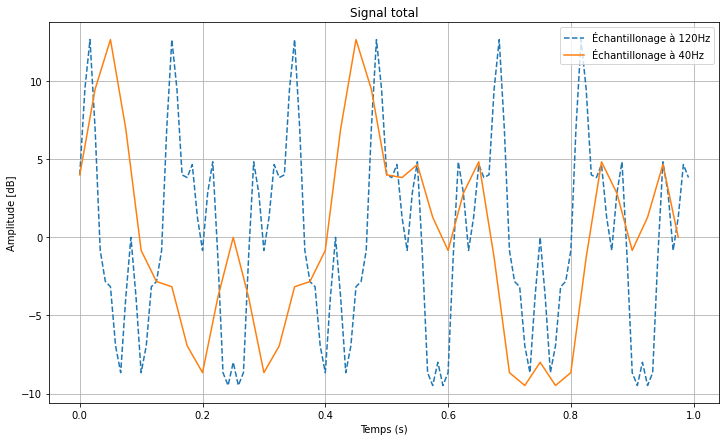

In [36]:
import math
arrayT40= np.arange(0,1,1/40)
arrayS40 =np.zeros(40)
arrayY1_40=np.zeros(40)
arrayY2_40=np.zeros(40)
arrayY3_40=np.zeros(40)

for i in range(39):
    arrayY1_40[i]=7*math.cos(2*math.pi*6*arrayT[i])
    arrayY2_40[i]=4*math.cos(2*math.pi*15*arrayT[i]+3*math.pi/2)
    arrayY3_40[i]=-3*math.cos(2*math.pi*30*arrayT[i])

arrayS40 = arrayY1_40 + arrayY2_40 + arrayY3_40
Fe2 = 40

plt.figure()
plt.plot(arrayT, S, '--')
plt.plot(arrayT40, arrayS40)
plt.title('Signal total')
plt.ylabel('Amplitude [dB]')
plt.xlabel('Temps (s)')
plt.grid()
plt.legend(["Échantillonage à 120Hz", "Échantillonage à 40Hz"])
plt.show()


**9.** En étudiant le nouve spectre: lequel des 3 signaux a été altéré par le sous-échantillonage? Pourquoi?

In [10]:
print('Le 3e signal (fréquence de 30 Hz) sera altéré par cette nouvelle fréquence d échantillonage puisque l aliasing (distorsion du signal) se produit lorsque la fréquence d échantillonage est inférieure à 2X la fréquence du signal. Les signaux Y1 et Y2 ne sont pas affectés, car leurs fréquences sont de 6Hz et de 15Hz. Effectivement, pour ce qui est de Y1, 12 Hz (2 X 6 Hz) est inférieur à 40 Hz alors il n y aura pas d aliasing. De manière similaire, pour Y2, 30 Hz (2 X 15 Hz) est inférieur à 40 Hz.')

Le 3e signal (fréquence de 30 Hz) sera altéré par cette nouvelle fréquence d échantillonage puisque l aliasing (distorsion du signal) se produit lorsque la fréquence d échantillonage est inférieure à 2X la fréquence du signal. Les signaux Y1 et Y2 ne sont pas affectés, car leurs fréquences sont de 6Hz et de 15Hz. Effectivement, pour ce qui est de Y1, 12 Hz (2 X 6 Hz) est inférieur à 40 Hz alors il n y aura pas d aliasing. De manière similaire, pour Y2, 30 Hz (2 X 15 Hz) est inférieur à 40 Hz.


**10.** Quel est la fréquence d'échantillonage minimale pour assurer une bonne mesure de ces signaux?

In [11]:
print('La fréquence d échantillonage minimale pour assurer une bonne mesure est de 60Hz. En effet, tel que mentionné à la question 9, la fréquence d échantillonage doit être supérieure ou égale à 2X la fréquence du signal pour éviter toute distorsion. Alors, Y3, ayant une fréquence de 30 Hz,  présente la fréquence la plus élevée. La fréquence d échantillonage doit alors être 2 fois supérieure à la fréqence de Y3, soit 60 Hz.')

La fréquence d échantillonage minimale pour assurer une bonne mesure est de 60Hz. En effet, tel que mentionné à la question 9, la fréquence d échantillonage doit être supérieure ou égale à 2X la fréquence du signal pour éviter toute distorsion. Alors, Y3, ayant une fréquence de 30 Hz,  présente la fréquence la plus élevée. La fréquence d échantillonage doit alors être 2 fois supérieure à la fréqence de Y3, soit 60 Hz.
